In [1]:
##imports from libraries
# import pandas as pd
import numpy as np
import time
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import resource
import time
from datetime import datetime
import math
import os
from sklearn import preprocessing
import sys
import cvxpy
from multiprocessing import Process, Pipe
from multiprocessing.pool import ThreadPool
import copy

###------------------- keras imports for the dataset and neural network --------------------##
import keras
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
# from keras.utils import np_utils
from keras import optimizers
from keras.layers.normalization import BatchNormalization


Using TensorFlow backend.


In [2]:
## Preprocessing of data
# Load data from keras:

(X_train, y_train), (X_test, y_test) = mnist.load_data()


# Reshape data for building the input vector from the 28x28 pixels

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# one-hot encoding using keras' numpy-related utilities
n_classes = 10 #complete
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test = keras.utils.to_categorical(y_test, n_classes)

In [3]:
## -------------------Deep Nural Network (DNN) -------------------------------------------
#----- Part (a) --------------------------------------------------------------------------

# Building a linear stack of layers with the sequential model

modelori = Sequential()
modelori.add(Dense(10, input_shape=(784,)))
modelori.add(Activation('relu'))                            

modelori.add(Dense(10))
modelori.add(Activation('relu'))

modelori.add(Dense(10))
modelori.add(Activation('softmax'))



# Question a
Train the DNN with SGD (batchsize=1). Record and show the performance. Visulize 9 correct/incorrect predicted samples respectively.

> lr= 0.001 , decay= 0.01 , momentum= 0.9 , nesterov= True , epoch = 100

In [4]:
##### -------------------------- Compiling the sequential model ---------------------------------
# sgd
sgd = optimizers.SGD(lr= 0.001 , decay= 0.0001 , momentum= 0.9 , nesterov= True ) # complete the command  
model = copy.copy(modelori)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer= sgd) # complete the command  

epochnum = 100

##-------------------------- Training and saving the model ----------------------------------------------
start = time.time()

## Saving metrics in history
# Complete the history: 
history = model.fit(X_train, Y_train,
          epochs= epochnum,
          verbose= 0 ,
          shuffle=True,
          validation_data=(X_test, Y_test))
end = time.time()

# saving the model
save_dir = "output/result/" # Complete
model_name = 'm1.h5' # Complete
model_path = os.path.join(save_dir, model_name)
model.save(model_path)

/home/zehang/anaconda3/envs/mlon/lib/python3.6/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


<Figure size 432x288 with 0 Axes>

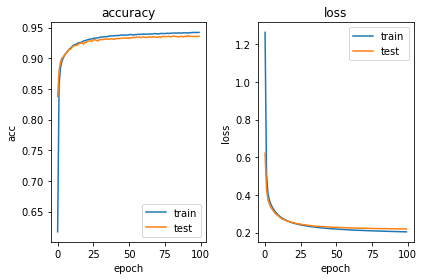

Test Loss 0.21865961545407772
Test Accuracy 0.9361000061035156


In [5]:
# plotting the metrics
fig = plt.figure()
# ----------------------- Plot your result here ---------------------

#Plot here
#--------------------------------------------------------------------
fig = plt.figure()
plt.subplot(1,2,1)
# print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

plt.show()
## Evaluate the model
mnist_model = load_model(model_path)
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2) #complete  

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

9361  classified correctly
639  classified incorrectly


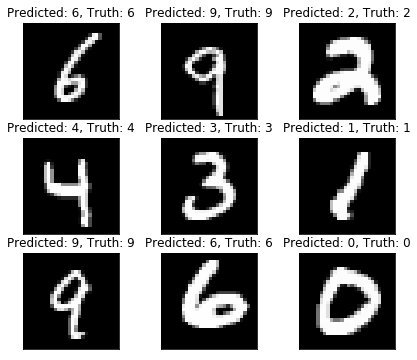

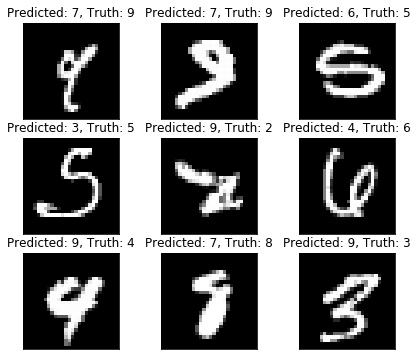

In [6]:
# ------------------------- Load the model and create predictions on the test set --------------------
mnist_model = load_model(model_path)
predicted_classes = mnist_model.predict_classes(X_test)

## --------- See which we predicted correctly and which not-----------
correct_indices = np.where(predicted_classes == y_test)[0]
incorrect_indices = np.where(predicted_classes != y_test)[0]

print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# Adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,6)

figure_evaluation_correct = plt.figure()
####----------------------------------------- Plot the results----------------
# plot 9 correct predictions
## plot here....

# sample 9 correct predicted images
X_correct_id = np.random.choice(correct_indices, 9)
X_correct = X_test[X_correct_id]
# 9 correct predicted samples
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_correct[i].reshape(28,28), cmap='gray', interpolation='none')
    plt.xticks([])
    plt.yticks([])
    plt.title("Predicted: {}, Truth: {}".format(predicted_classes[X_correct_id[i]], y_test[X_correct_id[i]]))

figure_evaluation_incorrect = plt.figure()
# 9 incorrect predicted samples
X_incorrect_id = np.random.choice(incorrect_indices, 9)
X_incorrect = X_test[X_incorrect_id]
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_incorrect[i].reshape(28,28), cmap='gray', interpolation='none')
    plt.xticks([])
    plt.yticks([])
    plt.title("Predicted: {}, Truth: {}".format(predicted_classes[X_incorrect_id[i]], y_test[X_incorrect_id[i]]))

# Question b (1)
Train the DNN with SGD (batchsize=256). Record and show the performance. Visulize 9 correct/incorrect predicted samples respectively.

> lr= 0.001 , decay= 0.01 , momentum= 0.9 , nesterov= True , epoch = 100

/home/zehang/anaconda3/envs/mlon/lib/python3.6/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


<Figure size 504x432 with 0 Axes>

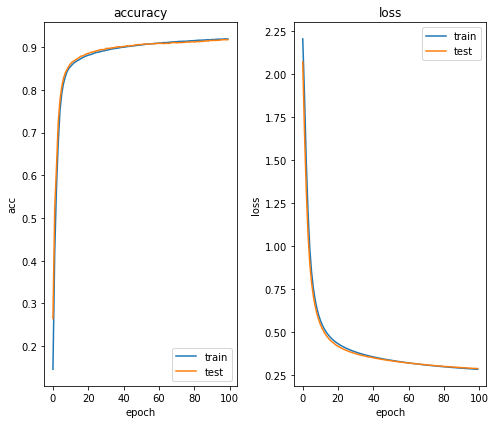

Test Loss 0.28574295409321787
Test Accuracy 0.9175000190734863
9175  classified correctly
825  classified incorrectly


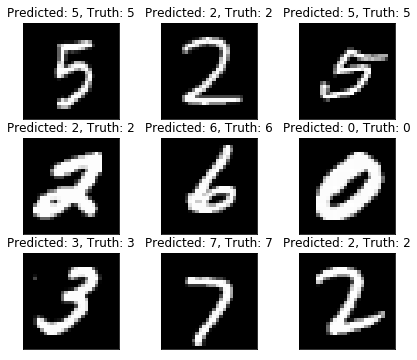

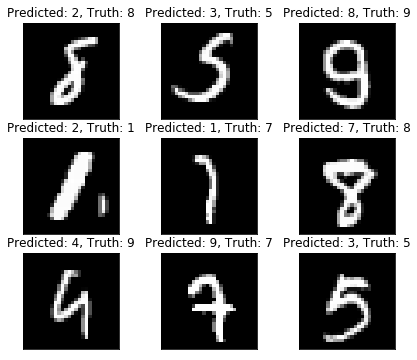

In [7]:
##------------------------- Part (b) -----------------------------------
# Repeat part (a) with mini-batch GD and compare the results:
##### -------------------------- Compiling the sequential model ---------------------------------
sgd = optimizers.SGD(lr= 0.001 , decay= 0.0001, momentum= 0.9 , nesterov= True ) # complete the command
model = copy.copy(modelori)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer= sgd) # complete the command  

epochnum = 100
batchsize = 256

##-------------------------- Training and saving the model ----------------------------------------------
start = time.time()

## Saving metrics in history

# Complete the history: 
history = model.fit(X_train, Y_train,
          epochs= epochnum,
          batch_size=batchsize,
          verbose= 0 ,
          shuffle=True,
          validation_data=(X_test, Y_test))
end = time.time()

# saving the model
save_dir = "output/result/" # Complete
model_name = 'm1_minibatch_{}_{}.h5'.format(batchsize, "sgd") # Complete
model_path = os.path.join(save_dir, model_name)
model.save(model_path)

# plotting the metrics
fig = plt.figure()
# ----------------------- Plot your result here ---------------------

#Plot here
#--------------------------------------------------------------------
fig = plt.figure()
plt.subplot(1,2,1)
# print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

plt.show()
## Evaluate the model
mnist_model = load_model(model_path)
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2) #complete  

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

# ------------------------- Load the model and create predictions on the test set --------------------
mnist_model = load_model(model_path)
predicted_classes = mnist_model.predict_classes(X_test)

## --------- See which we predicted correctly and which not-----------
correct_indices = np.where(predicted_classes == y_test)[0]
incorrect_indices = np.where(predicted_classes != y_test)[0]

print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# Adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,6)

figure_evaluation_correct = plt.figure()
####----------------------------------------- Plot the results----------------
# plot 9 correct predictions
## plot here....

# sample 9 correct predicted images
X_correct_id = np.random.choice(correct_indices, 9)
X_correct = X_test[X_correct_id]
# 9 correct predicted samples
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_correct[i].reshape(28,28), cmap='gray', interpolation='none')
    plt.xticks([])
    plt.yticks([])
    plt.title("Predicted: {}, Truth: {}".format(predicted_classes[X_correct_id[i]], y_test[X_correct_id[i]]))

figure_evaluation_incorrect = plt.figure()
# 9 incorrect predicted samples
X_incorrect_id = np.random.choice(incorrect_indices, 9)
X_incorrect = X_test[X_incorrect_id]
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_incorrect[i].reshape(28,28), cmap='gray', interpolation='none')
    plt.xticks([])
    plt.yticks([])
    plt.title("Predicted: {}, Truth: {}".format(predicted_classes[X_incorrect_id[i]], y_test[X_incorrect_id[i]]))

# Question b (2)
Compare the training performance among constant lr, diminishing, AdaGrad, RMSProp.

In [8]:
sgd_constant = optimizers.SGD(lr= 0.001 , momentum= 0.9 , nesterov= True ) # complete the command  
sgd_diminishing = optimizers.SGD(lr= 0.001 , decay= 0.0001 , momentum= 0.9 , nesterov= True ) # complete the command 
adagrad = optimizers.Adagrad(lr=0.001, epsilon=1e-6)
rmsprop = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-6)
epochnum = 200
batchsize = 256

In [9]:
# sgd constant
model = copy.copy(modelori)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer= sgd_constant) # complete the command  

##-------------------------- Training and saving the model ----------------------------------------------
start = time.time()

## Saving metrics in history

# Complete the history: 
history_sgdconstant = model.fit(X_train, Y_train,
          epochs= epochnum,
          batch_size=batchsize,
          verbose= 0 ,
          shuffle=True,
          validation_data=(X_test, Y_test))
end = time.time()
print("time 1: {}".format(end-start))
# saving the model
save_dir = "output/result/" # Complete
model_name = 'm1_minibatch_{}_sgdconstant.h5'.format(batchsize) # Complete
model_path = os.path.join(save_dir, model_name)
model.save(model_path)

/home/zehang/anaconda3/envs/mlon/lib/python3.6/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


time 1: 329.0053758621216


In [10]:
##sgd diminishing
model = copy.copy(modelori)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer= sgd_diminishing) # complete the command  
start = time.time()
history_sgddiminishing = model.fit(X_train, Y_train,
          epochs= epochnum,
          batch_size=batchsize,
          verbose= 0 ,
          shuffle=True,
          validation_data=(X_test, Y_test))
end = time.time()
print("time 2: {}".format(end-start))
# saving the model
save_dir = "output/result/" # Complete
model_name = 'm1_minibatch_{}_sgd_diminishing.h5'.format(batchsize) # Complete
model_path = os.path.join(save_dir, model_name)
model.save(model_path)

/home/zehang/anaconda3/envs/mlon/lib/python3.6/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


time 2: 313.009948015213


In [11]:
# adagrad
model = copy.copy(modelori)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer= adagrad) # complete the command  
start = time.time()
history_adagrad = model.fit(X_train, Y_train,
          epochs= epochnum,
          batch_size=batchsize,
          verbose= 0 ,
          shuffle=True,
          validation_data=(X_test, Y_test))
end = time.time()
print("time 3: {}".format(end-start))
# saving the model
save_dir = "output/result/" # Complete
model_name = 'm1_minibatch_{}_adagrad.h5'.format(batchsize) # Complete
model_path = os.path.join(save_dir, model_name)
model.save(model_path)

/home/zehang/anaconda3/envs/mlon/lib/python3.6/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


time 3: 342.59760546684265


In [12]:
# rmsprop
model = copy.copy(modelori)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer= rmsprop) # complete the command  
start = time.time()
history_rmsprop = model.fit(X_train, Y_train,
          epochs= epochnum,
          batch_size=batchsize,
          verbose= 0 ,
          shuffle=True,
          validation_data=(X_test, Y_test))
end = time.time()
print("time 4: {}".format(end-start))
# saving the model
save_dir = "output/result/" # Complete
model_name = 'm1_minibatch_{}_rmsprop.h5'.format(batchsize) # Complete
model_path = os.path.join(save_dir, model_name)
model.save(model_path)

/home/zehang/anaconda3/envs/mlon/lib/python3.6/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


time 4: 359.6253352165222


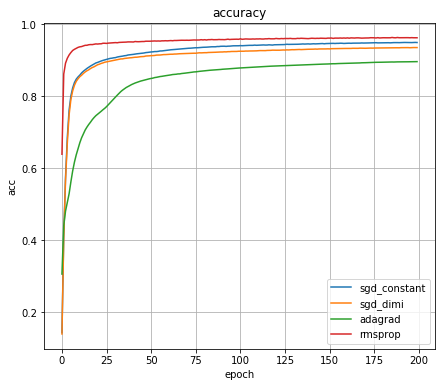

In [13]:
# plot the training performance wrt epoch
train_performance_q2 = plt.figure()
plt.plot(history_sgdconstant.history['accuracy'])
plt.plot(history_sgddiminishing.history['accuracy'])
plt.plot(history_adagrad.history['accuracy'])
plt.plot(history_rmsprop.history['accuracy'])
plt.title('accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['sgd_constant', 'sgd_dimi','adagrad','rmsprop'], loc='lower right')
# plt.ylim([0.5,1.0])
plt.grid()
plt.show()

In [ ]:
# how the loss
# plot the training loss wrt epoch
train_performance_q2_loss = plt.figure()
plt.plot(history_sgdconstant.history['loss'])
plt.plot(history_sgddiminishing.history['loss'])
plt.plot(history_adagrad.history['loss'])
plt.plot(history_rmsprop.history['loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['sgd_constant', 'sgd_dimi','adagrad','rmsprop'], loc='lower right')
# plt.ylim([0.5,1.0])
plt.grid()
plt.show()

# Problem c
Examine shallow network.

In [15]:
##------------------------- Part (c) ------------------------------------
# Repeat part (a) by fixing \sum_j N_j and discuss the results
# Building a shallow network
model_shallow = Sequential()
model_shallow.add(Dense(20, input_shape=(784,)))
model_shallow.add(Activation('relu'))                            
model_shallow.add(Dense(10))
model_shallow.add(Activation('softmax'))
# building a deeper network
model_deeper = Sequential()
model_deeper.add(Dense(5, input_shape=(784,)))
model_deeper.add(Activation('relu'))                            
model_deeper.add(Dense(5))
model_deeper.add(Activation('relu'))
model_deeper.add(Dense(5))
model_deeper.add(Activation('relu'))
model_deeper.add(Dense(5))
model_deeper.add(Activation('relu'))
model_deeper.add(Dense(10))
model_deeper.add(Activation('softmax'))

In [16]:
##sgd diminishing
sgd_diminishing = optimizers.SGD(lr= 0.001 , decay= 0.0001 , momentum= 0.9 , nesterov= True ) # complete the command 
model_shallow.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer= sgd_diminishing) # complete the command  
start = time.time()
history_sgddiminishing_shallow = model_shallow.fit(X_train, Y_train,
          epochs= epochnum,
          batch_size=batchsize,
          verbose= 0 ,
          shuffle=True,
          validation_data=(X_test, Y_test))
end = time.time()
print("time 2: {}".format(end-start))
# saving the model
save_dir = "output/result/" # Complete
model_name = 'm1_minibatch_{}_history_sgddiminishing_shallow.h5'.format(batchsize) # Complete
model_path = os.path.join(save_dir, model_name)
model.save(model_path)

time 2: 283.8604938983917


In [17]:
##sgd diminishing
sgd_diminishing = optimizers.SGD(lr= 0.001 , decay= 0.0001 , momentum= 0.9 , nesterov= True ) # complete the command 
model_deeper.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer= sgd_diminishing) # complete the command  
start = time.time()
history_sgddiminishing_deeper = model_deeper.fit(X_train, Y_train,
          epochs= epochnum,
          batch_size=batchsize,
          verbose= 0 ,
          shuffle=True,
          validation_data=(X_test, Y_test))
end = time.time()
print("time: {}".format(end-start))
# saving the model
save_dir = "output/result/" # Complete
model_name = 'm1_minibatch_{}_history_sgddiminishing_deeper.h5'.format(batchsize) # Complete
model_path = os.path.join(save_dir, model_name)
model.save(model_path)

time: 378.08475375175476


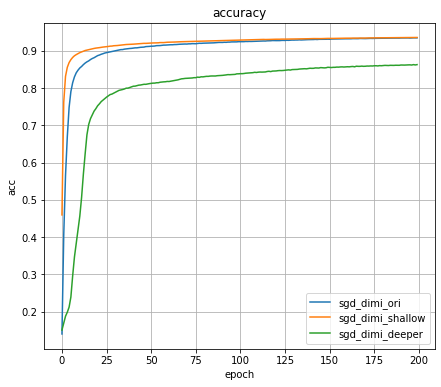

In [18]:
# plot the training performance wrt epoch
train_performance_q3 = plt.figure()
plt.plot(history_sgddiminishing.history['accuracy'])
plt.plot(history_sgddiminishing_shallow.history['accuracy'])
plt.plot(history_sgddiminishing_deeper.history['accuracy'])
plt.title('accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['sgd_dimi_ori', 'sgd_dimi_shallow', 'sgd_dimi_deeper'])#, loc='lower right')
# plt.ylim([0.5,1.0])
plt.grid()
plt.show()

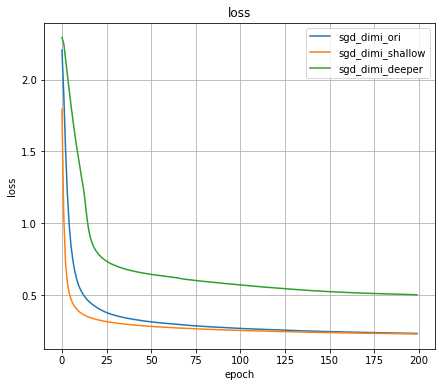

In [19]:
# how the loss
# plot the training loss wrt epoch
train_performance_q3_loss = plt.figure()
plt.plot(history_sgddiminishing.history['loss'])
plt.plot(history_sgddiminishing_shallow.history['loss'])
plt.plot(history_sgddiminishing_deeper.history['loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['sgd_dimi_ori', 'sgd_dimi_shallow', 'sgd_dimi_deeper'])#, loc='lower right')
# plt.ylim([0.5,1.0])
plt.grid()
plt.show()

# Quetstion 4
6 random disjoint workers, master worker computational graph

In [110]:
numworker = 6
randind = np.arange(X_train.shape[0])
np.random.shuffle(randind)
randset = np.split(randind, numworker)
print(X_train[randset[0]].shape)
print(Y_train[randset[0]].shape)

(10000, 784)
(10000, 10)


In [3]:
## ----------------------- Part (d) -------------------------------------

# Split the dataset to 6 random disjoint subsets, each for one worker, and repeat part (a) on master-worker computational graph.
numworker = 6
batchsize = 256
randind = np.arange(X_train.shape[0])
np.random.shuffle(randind)
randset = np.split(randind, numworker)

## Prepare the data here:
X_train_split = []
Y_train_split = []
for i in range(numworker):
    X_train_split.append(X_train[randset[i]])
    Y_train_split.append(Y_train[randset[i]])

In [6]:
## Compute the weights and DNN layers here:
# models = []

epochnum = 1
layers = []
model_ = Sequential()
l1_ = Dense(10, input_shape=(784,), activation='relu')
model_.add(l1_)
layers.append(l1_)
l2_ = Dense(10, activation = 'relu')
model_.add(l2_)
layers.append(l2_)
l3_ = Dense(10, activation = 'softmax')
model_.add(l3_)
layers.append(l3_)


master_param = {layer_num:{'w':np.random.randn(layers[layer_num].get_weights()[0].shape[0], layers[layer_num].get_weights()[0].shape[1]),'b':np.zeros_like(layers[layer_num].get_weights()[1])} for layer_num in range(3)}
# print(master_param)
# master_param = {'l1': {'w':np.zeros((784,10)), 'b': }}
worker_param_l1 = {i:{'w':np.zeros_like(layers[0].get_weights()[0]),'b':np.zeros_like(layers[0].get_weights()[1])} for i in range(numworker)}
worker_param_l2 = {i:{'w':np.zeros_like(layers[1].get_weights()[0]),'b':np.zeros_like(layers[1].get_weights()[1])} for i in range(numworker)}
worker_param_l3 = {i:{'w':np.zeros_like(layers[2].get_weights()[0]),'b':np.zeros_like(layers[2].get_weights()[1])} for i in range(numworker)}

# worker_param_l2 = {i:{'w':np.zeros_like(layers[1]),'b':np.zeros_like(l2_weights[1])} for i in range(numworker)}
# worker_param_l3 = {i:{'w':np.zeros_like(layers[2]),'b':np.zeros_like(l3_weights[1])} for i in range(numworker)}

iter_num = 20
loss = np.zeros((numworker,iter_num))
# print(loss.shape)
for iter in range(iter_num):
    # print(iter, np.sum(master_param[0]['w']))
    # print(iter, np.sum(loss, axis=0)[iter])

    tmp_master_param = {layer_num:{'w': np.zeros_like(layers[layer_num].get_weights()[0]),'b':np.zeros_like(layers[layer_num].get_weights()[1])} for layer_num in range(3)}
    for i in range(numworker):
        
        model = Sequential()
        l1 = Dense(10, input_shape=(784,), activation='relu')
        model.add(l1)
        l1.set_weights([master_param[0]['w'], master_param[0]['b']])

        l2 = Dense(10, activation = 'relu')
        model.add(l2)
        l2.set_weights([master_param[1]['w'], master_param[1]['b']])

        l3 = Dense(10, activation = 'softmax')
        model.add(l3)
        l3.set_weights([master_param[2]['w'], master_param[2]['b']])


        sgd = optimizers.SGD(lr=0.01, decay=0.000001, momentum=0.9, nesterov=True)
        model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

        # print(iter,i,np.sum(l1.get_weights()[0]))
        print("iteration: ", iter, " worker: ", i)
        history = model.fit(X_train_split[i], Y_train_split[i],
            epochs= epochnum,
            verbose= 2,
            shuffle=True)
        
        loss[i][iter] =history.history['loss'][0]
        # print("before: ", iter,i,np.sum(l1.get_weights()[0]))
        worker_param_l1[i]['w'],worker_param_l1[i]['b'] = l1.get_weights()
        worker_param_l2[i]['w'],worker_param_l2[i]['b'] = l2.get_weights()
        worker_param_l3[i]['w'],worker_param_l3[i]['b'] = l3.get_weights()
        # print("after: ", iter,i,np.sum(l1.get_weights()[0]))


    # models.append(model_param)
    for j in range(numworker):
        
        tmp_master_param[0]['w'] += worker_param_l1[j]['w']
        tmp_master_param[1]['w'] += worker_param_l2[j]['w']
        tmp_master_param[2]['w'] += worker_param_l3[j]['w']
        tmp_master_param[0]['b'] += worker_param_l1[j]['b']
        tmp_master_param[1]['b'] += worker_param_l2[j]['b']
        tmp_master_param[2]['b'] += worker_param_l3[i]['b']
    for layer_tmp in range(3):
        master_param[layer_tmp]['w'] = tmp_master_param[layer_tmp]['w']/numworker
    # master_param[1]['w'] = tmp_master_param[1]['w']/numworker
    # master_param[2]['w'] = tmp_master_param[2]['w']/numworker
        master_param[layer_tmp]['b'] = tmp_master_param[layer_tmp]['b']/numworker
    # master_param[1]['b'] = tmp_master_param[1]['b']/numworker
    # master_param[2]['b'] = tmp_master_param[2]['b']/numworker
    print(iter, np.mean(loss, axis=0)[iter])
## Complile the sequential model here:



## Plotting the metrics here:

iteration:  0  worker:  0
Epoch 1/1
 - 1s - loss: 2.5751 - accuracy: 0.1475
iteration:  0  worker:  1
Epoch 1/1
 - 1s - loss: 2.3658 - accuracy: 0.2537
iteration:  0  worker:  2
Epoch 1/1
 - 1s - loss: 2.4581 - accuracy: 0.2108
iteration:  0  worker:  3
Epoch 1/1
 - 1s - loss: 2.5793 - accuracy: 0.1526
iteration:  0  worker:  4
Epoch 1/1
 - 1s - loss: 2.4983 - accuracy: 0.1931
iteration:  0  worker:  5
Epoch 1/1
 - 1s - loss: 2.3511 - accuracy: 0.2385
0 2.4712776869138082
iteration:  1  worker:  0
Epoch 1/1
 - 1s - loss: 1.7853 - accuracy: 0.3596
iteration:  1  worker:  1
Epoch 1/1
 - 1s - loss: 1.7489 - accuracy: 0.3758
iteration:  1  worker:  2
Epoch 1/1
 - 1s - loss: 1.7539 - accuracy: 0.3683
iteration:  1  worker:  3
Epoch 1/1
 - 1s - loss: 1.7717 - accuracy: 0.3637
iteration:  1  worker:  4
Epoch 1/1
 - 1s - loss: 1.7424 - accuracy: 0.3666
iteration:  1  worker:  5
Epoch 1/1
 - 1s - loss: 1.7830 - accuracy: 0.3509
1 1.7641949608484904
iteration:  2  worker:  0
Epoch 1/1
 - 1s - lo

# Question 5
dropout

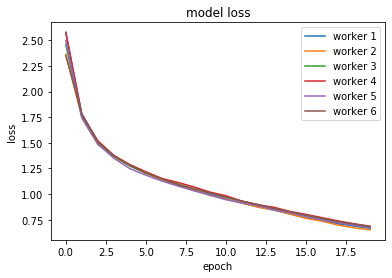

In [7]:
# plotting the losses
fig = plt.figure()
plt.subplot(1,1,1)
plt.plot(loss[0,:])
plt.plot(loss[1,:])
plt.plot(loss[2,:])
plt.plot(loss[3,:])
plt.plot(loss[4,:])
plt.plot(loss[5,:])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['worker 1', 'worker 2', 'worker 3', 'worker 4', 'worker 5', 'worker 6'], loc='upper right')
plt.show()

In [20]:
##--------------------------- Part (e) ---------------------------------

# Building a linear stack of layers with the sequential model here:
## You can use this command: model.add(Dropout(...))
# Building a linear stack of layers with the sequential model

batchsize = 256
epochnum = 200

model = Sequential()
model.add(Dense(10, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(10))
model.add(Activation('softmax'))

# compiling the sequential model
sgd_diminishing = optimizers.SGD(lr=0.001, decay=0.0001, momentum=0.9, nesterov=True)
# Training the model and saving metrics in history here:
##sgd diminishing
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer= sgd_diminishing) # complete the command  
start = time.time()
history_sgddiminishing_dropout = model.fit(X_train, Y_train,
          epochs= epochnum,
          batch_size=batchsize,
          verbose= 0 ,
          shuffle=True,
          validation_data=(X_test, Y_test))
end = time.time()
print("time 2: {}".format(end-start))
# saving the model
save_dir = "output/result/" # Complete
model_name = 'm1_minibatch_{}_sgd_diminishing_dropout.h5'.format(batchsize) # Complete
model_path = os.path.join(save_dir, model_name)
model.save(model_path)


time 2: 360.5612359046936


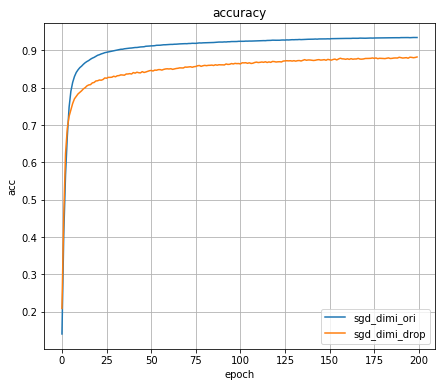

In [21]:
# plot the training performance wrt epoch
# compare with the original network
train_performance_q5 = plt.figure()
plt.plot(history_sgddiminishing.history['accuracy'])
plt.plot(history_sgddiminishing_dropout.history['accuracy'])
plt.title('accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['sgd_dimi_ori', 'sgd_dimi_drop'])#, loc='lower right')
# plt.ylim([0.5,1.0])
plt.grid()
plt.show()

# Question 6
Using batchnorm to improve smoothness

In [22]:
##--------------------------- Part (f) ---------------------------------

# Building a linear stack of layers with the sequential model here:
## You can use this command: model.add(BatchNormalization())

# # no bn
# batchsize = 256
# epochnum = 200

# model = Sequential()
# model.add(Dense(10, input_shape=(784,)))
# model.add(Activation('relu'))                            
# model.add(Dense(10))
# model.add(Activation('relu'))
# model.add(Dense(10))
# model.add(Activation('softmax'))

# # compiling the sequential model
# sgd_diminishing = optimizers.SGD(lr=0.001, decay=0.01, momentum=0.9, nesterov=True)
# model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer= sgd_diminishing) # complete the command  
# start = time.time()
# history_sgddiminishing_nobn = model.fit(X_train, Y_train,
#           epochs= epochnum,
#           batch_size=batchsize,
#           verbose= 0 ,
#           shuffle=True,
#           validation_data=(X_test, Y_test))
# end = time.time()
# print("time 2: {}".format(end-start))
# # saving the model
# save_dir = "output/result/" # Complete
# model_name = 'm1_minibatch_{}_sgd_diminishing_nobn.h5'.format(batchsize) # Complete
# model_path = os.path.join(save_dir, model_name)
# model.save(model_path)


# bn


batchsize = 128
epochnum = 200

model = Sequential()
model.add(Dense(10, input_shape=(784,)))
model.add(BatchNormalization())
model.add(Activation('relu'))                            
model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation('softmax'))

# compiling the sequential model
sgd_diminishing = optimizers.SGD(lr=0.001, decay=0.0001, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer= sgd_diminishing) # complete the command  
start = time.time()
history_sgddiminishing_bn = model.fit(X_train, Y_train,
          epochs= epochnum,
          batch_size=batchsize,
          verbose= 0 ,
          shuffle=True,
          validation_data=(X_test, Y_test))
end = time.time()
print("time 2: {}".format(end-start))
# saving the model
save_dir = "output/result/" # Complete
model_name = 'm1_minibatch_{}_sgd_diminishing_bn.h5'.format(batchsize) # Complete
model_path = os.path.join(save_dir, model_name)
model.save(model_path)



time 2: 930.4627695083618


In [23]:
# plot the training performance wrt epoch
# compare with the original network
train_performance_q6 = plt.figure()
plt.plot(history_sgddiminishing_nobn.history['accuracy'])
plt.plot(history_sgddiminishing_bn.history['accuracy'])
plt.title('accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['sgd_dimi_nobn', 'sgd_dimi_bn'])#, loc='lower right')
# plt.ylim([0.5,1.0])
plt.grid()
plt.show()

NameError: name 'history_sgddiminishing_nobn' is not defined

<Figure size 504x432 with 0 Axes>